# Catch Me If You Can: Individual User EDA

**Date:** 23 November 2024

**Link to dataset:** https://www.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking

In [1]:
import sys
import os

sys.path.append(os.path.abspath("../../"))

In [2]:
from cybergpt.datasets.loaders import AliceLoader
from cybergpt.datasets.websites import (
    WebsiteDataset,
    plot_temporal_patterns,
    plot_temporal_stability,
)
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
ALICE_CSV = "../../data/kaggle/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking/train/Alice_log.csv"

In [4]:
df = pd.read_csv(ALICE_CSV)
df = AliceLoader.preprocess_user_frame(df)

In [5]:
hourly_activity, daily_activity, daily_volume = (
    WebsiteDataset.analyse_temporal_patterns(df)
)
rapid_requests, unusual_hours = WebsiteDataset.detect_anomalous_patterns(df)
domain_counts, large_volume_domains, category_distribution = (
    WebsiteDataset.analyse_domain_patterns(df)
)
similarity_df, distributions = WebsiteDataset.analyse_temporal_stability(df)

# Summary Stats

## Browsing Activity

In [6]:
print(f"Total records: {len(df)}")
print(f"Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"Unique domains visited: {df['domain'].nunique()}")

Total records: 22769
Date range: 2013-02-12 16:25:10 to 2014-04-15 18:07:50
Unique domains visited: 528


## Unusual Activity

In [7]:
print(f"Rapid succession requests: {rapid_requests}")
print(f"Unusual hours activity: {unusual_hours}")

Rapid succession requests: 10537
Unusual hours activity: 0


## Domains

In [8]:
print("Top 10 most visited domains:")
print(domain_counts.head(10))

Top 10 most visited domains:
domain
youtube.com        2736
google.com         2205
googlevideo.com    2094
ytimg.com          1908
facebook.com       1609
google.fr          1606
twitter.com         601
live.com            556
melty.fr            486
leboncoin.fr        426
Name: count, dtype: int64


## Distributional Stability Over Time

In [10]:
print("Average Jensen-Shannon distances by day:")
print(similarity_df.groupby("day_of_week")["js_distance"].mean())

Average Jensen-Shannon distances by day:
day_of_week
0    0.330614
1    0.665451
3    0.722116
4    0.545295
Name: js_distance, dtype: float64


# Plots

/Users/marcos/Documents/projects/bai/cybergpt-datasets/datasets/websites.py:415: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(days)


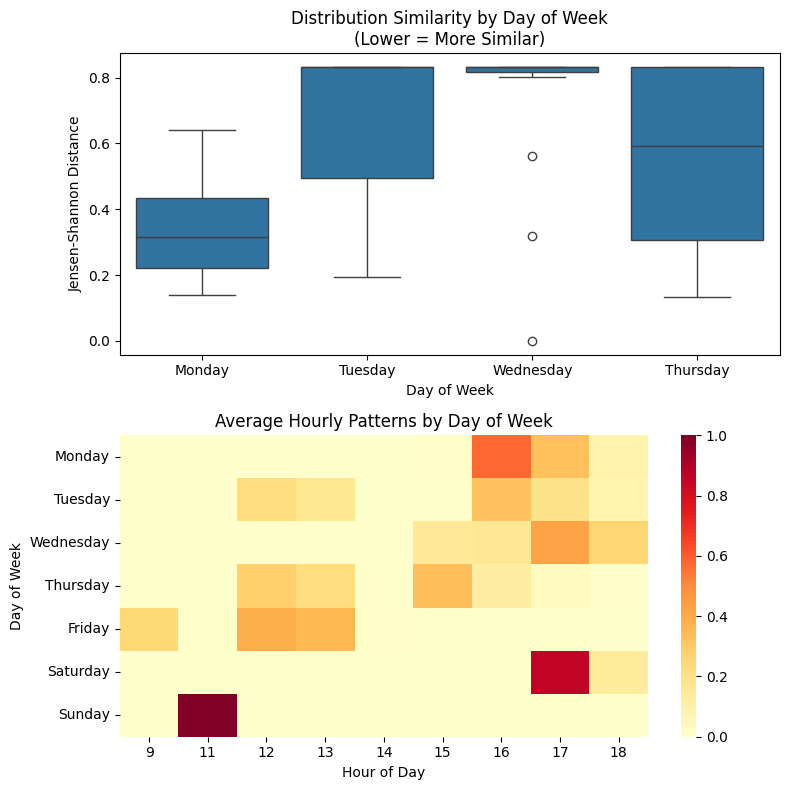

In [11]:
plot_temporal_stability(similarity_df, distributions)
plt.show()

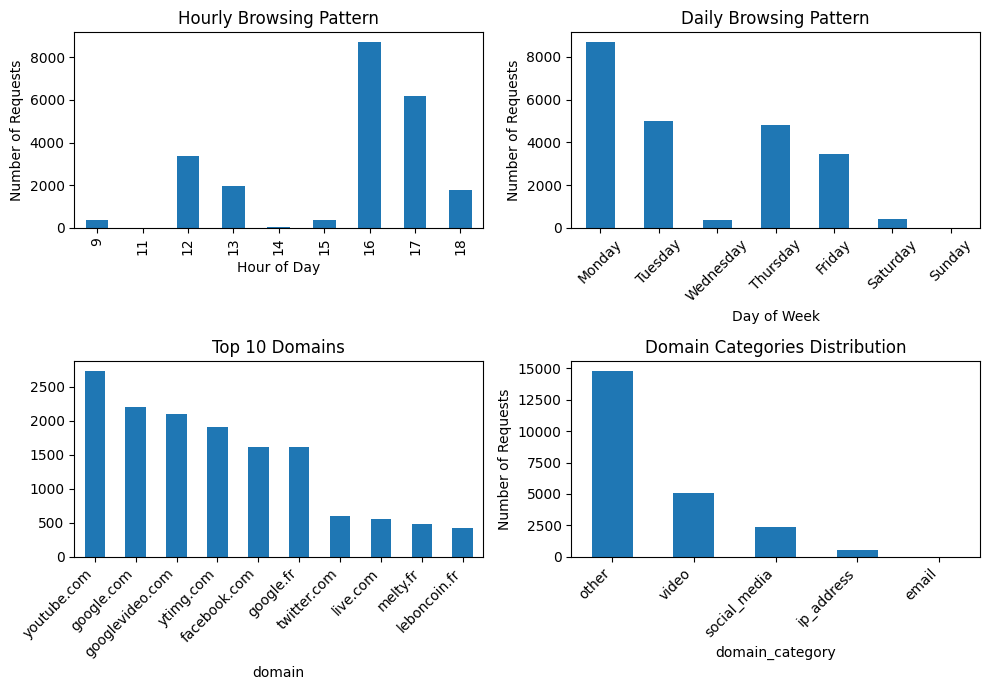

In [12]:
plot_temporal_patterns(
    hourly_activity, daily_activity, domain_counts, category_distribution
)
plt.show()